In [27]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [30]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11354 files belonging to 30 classes.


In [31]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [32]:
# Load the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [33]:
# Freeze all the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [34]:
# Define the model
from tensorflow.keras.layers import Dropout
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,436,574 (154.25 MB)

 Trainable params: 25,721,886 (98.12 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [38]:
# Fit the model
training_model=model.fit(training_set, epochs=15, validation_data=validation_set , callbacks=callback)

Epoch 1/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 1485s 4s/step - accuracy: 0.6957 - loss: 15.6978 - val_accuracy: 0.9395 - val_loss: 0.6654
Epoch 2/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 1146s 3s/step - accuracy: 0.9080 - loss: 0.9844 - val_accuracy: 0.9321 - val_loss: 0.8407
Epoch 3/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 1099s 3s/step - accuracy: 0.9164 - loss: 0.9446 - val_accuracy: 0.9633 - val_loss: 0.5088
Epoch 4/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 1007s 3s/step - accuracy: 0.9417 - loss: 0.8046 - val_accuracy: 0.9480 - val_loss: 0.9688
Epoch 5/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 984s 3s/step - accuracy: 0.9327 - loss: 1.3840 - val_accuracy: 0.9593 - val_loss: 0.8205
Epoch 6/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 985s 3s/step - accuracy: 0.9594 - loss: 0.7847 - val_accuracy: 0.9558 - val_loss: 1.2309
Epoch 7/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 986s 3s/step - accuracy: 0.9471 - loss: 1.3384 - val_accuracy: 0.9560 - val_loss: 1.1893
Epoch 8/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 996s 3s/step - accuracy: 0.9587 - loss: 1.0580 - val

In [39]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 1251s 4s/step - accuracy: 0.9986 - loss: 0.0461


In [40]:
# model evaluation on training set

validation_loss , validation_accuracy = model.evaluate(validation_set)

133/133 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.9766 - loss: 0.9698


In [41]:
tf.keras.callbacks.History()

In [42]:
training_model.history

{'accuracy': [0.8168927431106567,
  0.911484956741333,
  0.9235511422157288,
  0.9381715655326843,
  0.935441255569458,
  0.9575480222702026,
  0.9540250301361084,
  0.9567553400993347,
  0.9635370969772339,
  0.9675004482269287,
  0.970230758190155,
  0.9719922542572021,
  0.9769244194030762],
 'loss': [5.313275337219238,
  0.9731552004814148,
  0.8769798874855042,
  0.9237046241760254,
  1.412433385848999,
  0.8686096668243408,
  1.1694692373275757,
  1.1763428449630737,
  1.1156870126724243,
  1.0485336780548096,
  1.1371378898620605,
  1.107027292251587,
  0.8840808868408203],
 'val_accuracy': [0.939451277256012,
  0.9321191906929016,
  0.963339626789093,
  0.9479659199714661,
  0.9593188166618347,
  0.9557710289955139,
  0.9560075402259827,
  0.982970654964447,
  0.9557710289955139,
  0.9798959493637085,
  0.9701986908912659,
  0.9789498448371887,
  0.9796594381332397],
 'val_loss': [0.6654037833213806,
  0.8407370448112488,
  0.508815586566925,
  0.968801736831665,
  0.8204592466

In [45]:
# viz

epochs = [i for i in range(1,14)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

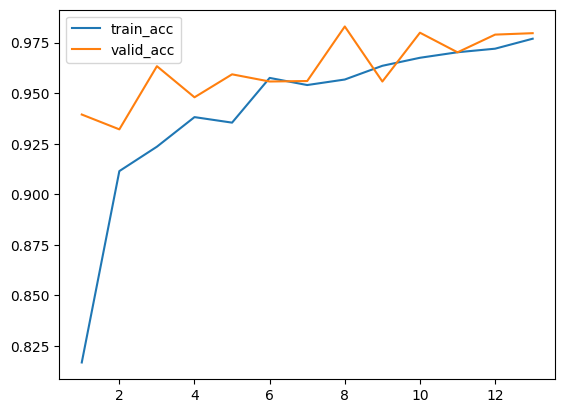

In [46]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

In [47]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [48]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [49]:
y_pred = model.predict(test_set)
y_pred

133/133 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.5085164e-35, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [50]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [51]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(4228, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [52]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [53]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.95      1.00      0.98       188
                 Basale       0.97      0.97      0.97       188
                  Betel       1.00      1.00      1.00       168
          Crape_Jasmine       0.94      1.00      0.97       188
                  Curry       0.98      0.94      0.96       188
              Drumstick       0.99      0.99      0.99       188
              Fenugreek       1.00      0.95      0.98       188
                  Guava       1.00      1.00      1.00       188
               Hibiscus       1.00      0.99      1.00       130
           Indian_Beech       1.00      1.00      1.00       128
         Indian_Mustard       1.00      1.00      1.00       128
              Jackfruit       0.98      1.00      0.99       128
Jamaica_Cherry-Gasagase       1.00      1.00      1.00       128
                  Jamun       1.00      0.92      0.96        90
                Jasmine 

In [54]:
model.save("VGG16.keras")

In [55]:
cm = confusion_matrix(y_true , predicted_categories)
cm.shape

(30, 30)

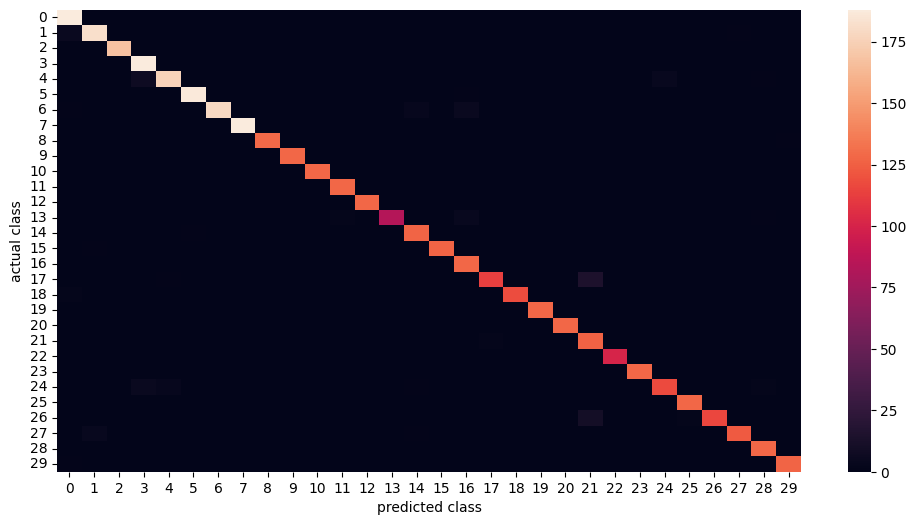

In [56]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(cm)
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

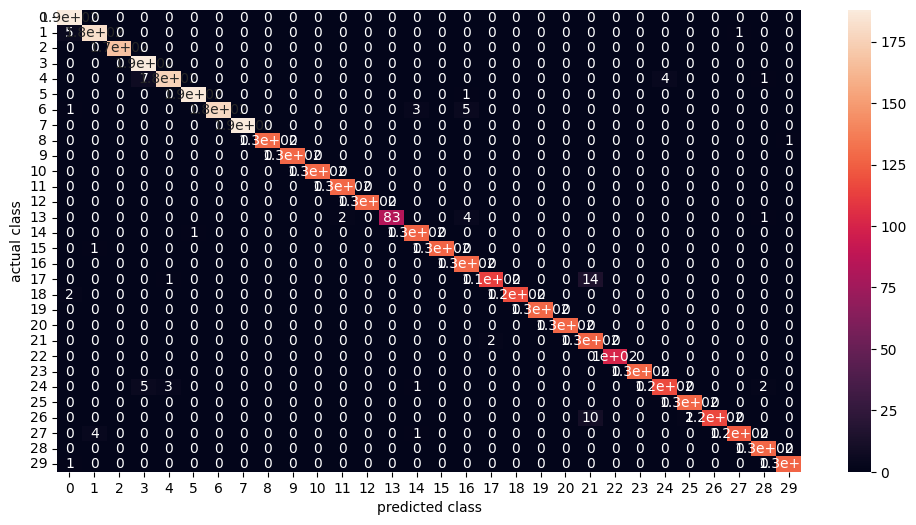

In [57]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(cm , annot=True)
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

In [26]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

NameError: name 'r' is not defined

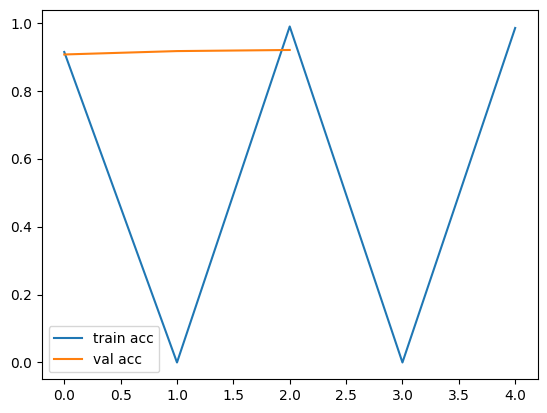

<Figure size 640x480 with 0 Axes>

In [37]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# import tensorflow as tf

# from keras.models import load_model

# model.save('VGG16.keras')